

# Project: Investigate a Dataset - [No-Show Analysis in Brazillian Healthcare Program ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Hereunder an analysis will be be performed for about 100K Brazillian patients records in a CSV file with divesity of Gender,  sponsored by healthcare program or not, Age, Medical conditions, A follow-up message status and bove all the attendance situation for their medical appointment. 
The dataset seems, from the first sight, organized but a further cleaning will be performed in the sake of finding the root cause of the no-show from the medical appointment which cost the government and waste resources. 

### Question(s) for Analysis
What factor/s may affect the attendance of a patient in the clinic the day of his medical appointment? 

In [1]:
# first importing the needed liberaies foranalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
In this phase the dataset will be overseen for cleanliness and accessability for easier analysis



### Dataset overview

A process of investigating the data in terms of:
-Errors
-Typos
-Duplicats
-Labelling
-Inconsistency
-Null or Blank records

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# The formation of the data set
df.shape

(110527, 14)

A dataset consisted of 110527 row and 14 columns

In [5]:
#General oveview on the data type and blank records 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the data info, there is no null values and there is data types need to be revised, if the column needed in analysis

In [6]:
df.duplicated().sum()

0

No Duplicate records in the dataset

In [7]:
# Investigating few statistacal aspects of the population to get more insights 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The statistics revealed some insights like 
(A bad record for -1 years old patient)
Majorty of population's age range from 37 to 55 years, meaning they are in the working fields, mostly.
a small group of patients have been registered to the healthcare program
An average of 19.7% of patients with hypertension condition 
A low average of patient having diabetes. 
Majorty of the patients are non-alcoholic. 
Handicaped patients are about one fifth of the population 
A relatively small propotrion of the patients received SMS prior to the medical appointment.

### Data Cleaning

In [8]:
#first locating the bad record of -1 years old 
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
#Then removing it, as it will not affect the overall 
# And then reassurance of the deletion
df.drop(index=99832, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
#Extracting the needed columns for analysis 
# CLeaning the typos by remaning and correction of incossistent labelling
#Then validating the cleaning process
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1, inplace=True)
df.rename(columns = {'No-show' :'No_Show','Hipertension':'Hypertension','Handcap':'Handicap'}, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Removing the Patient ID and The Appointment ID as it is an identifiers for the records will not help in analysis 


My opinion is that removing the scheduled and appointment date will not affect the attendance of the patient, as if he/she is committed, he/she will reschedule if it is inconvenient for him/her

The No_Show column may be confusing so that the No meaning Showed-up and vise versa. to make it easier in the visualization an assigment will be made  

In [11]:
show = df.No_Show == 'No'
noshow = df.No_Show == 'Yes'

<a id='eda'></a>
## Exploratory Data Analysis
For the exploratory phase, visualization will be of great assistance in elaborating the dataset in order to provide an answer to the research question
### What factor/s may affect the attendance of a patient in the clinic the day of his medical appointment? 

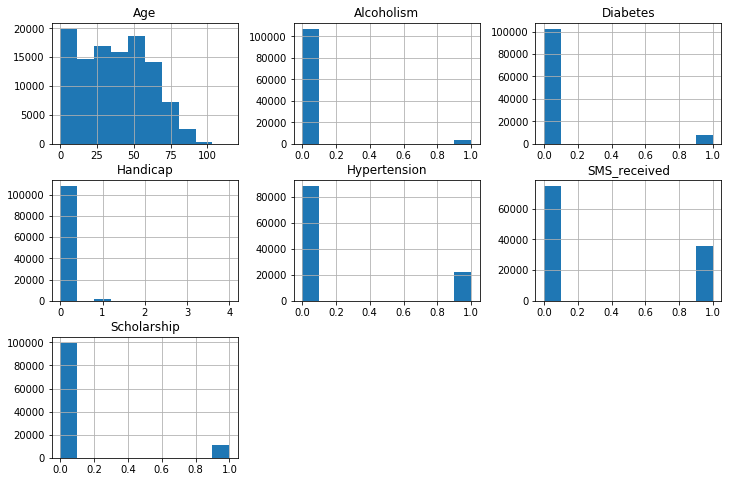

In [12]:
# re-viewing the dataset from visualization prespective

df.hist(figsize=(12,8));

Investigating the age, scholarship, gender, and SMS reception in relation to attendance may provide insight into the main reason for non-attendance

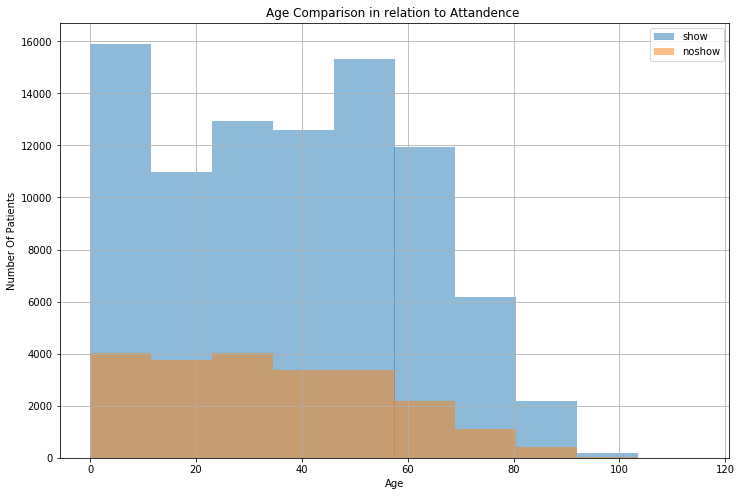

In [13]:
plt.figure(figsize=(12,8))
df.Age[show].hist(alpha = 0.5, label = 'show')
df.Age[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Age Comparison in relation to Attandence ')
plt.xlabel('Age')
plt.ylabel('Number Of Patients');

According to the age correlation, younger people are more likely to visit the doctor than older people.

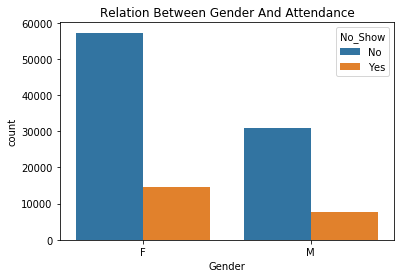

In [14]:
# taking the Gender aspect to correlate to attendance
def my_plot(column, title, xlabel, ylabel):

    sns.countplot(x= column, data= df, hue= 'No_Show')
    plt.title(title)
    plt.show()
my_plot('Gender', 'Relation Between Gender And Attendance', 'Gender', 'No_Show')

There is a greater commitment among females to keep their appointment than among males, perhaps as a result of adherence to work schedules 

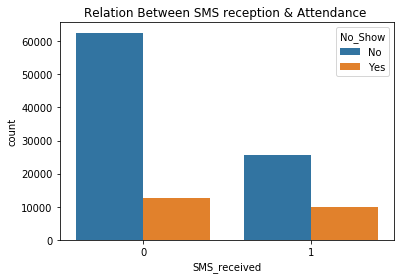

In [15]:
#Getting to the reminder SMS effect on attendance
my_plot('SMS_received', 'Relation Between SMS reception & Attendance ', 'SMS_received', 'No_Show')

A remarkable note, the patients who didn't receive a SMS were more likely to show than whom didn't receive.

Messaging process needs to be revisited, as it has a lower cost and an effective way for reminding and even rescheduling.

<a id='conclusions'></a>
## Conclusions
"Of course correrlation is not the causation of the event"
From that point, I wish to summarize that 
(First)The Gender have a positive correlation to the attendance may be due to accompining the childern or the working commitments of the males, so my recommendation ,to get higher showing rate in relation to gender, is to consider the week-end appointments to the male gender.
(Second) The SMS process needs to be revised in terms of the clearity of content and the reply with the confirmation on the attendance to make it interactive and personalized message.
The Age influance the attendance markedly as the least attending group are seniors, which I recommend to direct their appointment toward the nearest facility.
## Limitation 
-If we could know that whether the patients who recorded as not shown had re-scadulaed  their appointment or not, it may be helpful in terms of a larger scope of time and assessing the overall process
-The Numder of registered patient in the healthcare program is small, and need to be revised for a better healthcare service.


In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0